# Introducción a Pandas y DataFrame



<a id='1'></a>

# 1. ¿Qué es pandas y por qué debería usarlo?
<center><img src='img/cleaning-data.jpg'></center>

(Fuente: [Forbes](https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/#1ba071616f63))


Pandas es sin lugar a dudas la librería más utilizada en el ecosistema Python para el análisis y manipulación de datos. Es rápida, potente, flexible, fácil de usar, ¡y de código abierto! 


Entre sus principales características destacan:
* Un rápido y eficiente objeto **DataFrame** para la manipulación de datos con indexación integrada;
* **Lectura y escritura** de datos en multitud de formatos: Microsoflt Excel, CSV, Bases de datos SQL, etc.;
* Métodos integrados y eficientes para toda clases de **manipulación de datos**: missing data, subsetting, join, merge, etc.; 
* Facilidad para trabajar con **datos temporales** (de hecho, Pandas recibe su nombre de "PANnel DAta") 
* Buena **integración con otras librerías** de análisis de datos o Machine learning: scikit-learn, scipy, seaborn, plotly, etc;
* Es **ampliamente utilizada** tanto en el sector privado como en el académico

In [24]:
# y esto es todo lo que necesitas para disfrutar del poder de pandas!!
import pandas as pd

# 2. Introducción a Pandas DataFrame

DataFrame es probablemente el objeto de pandas más utilizado. Se trata de una estructura de datos etiquetados en 2 dimensiones cuyas columnas son de tipos potencialmente diferentes. Puedes pensar en ello como una hoja de cálculo o una tabla SQL. 

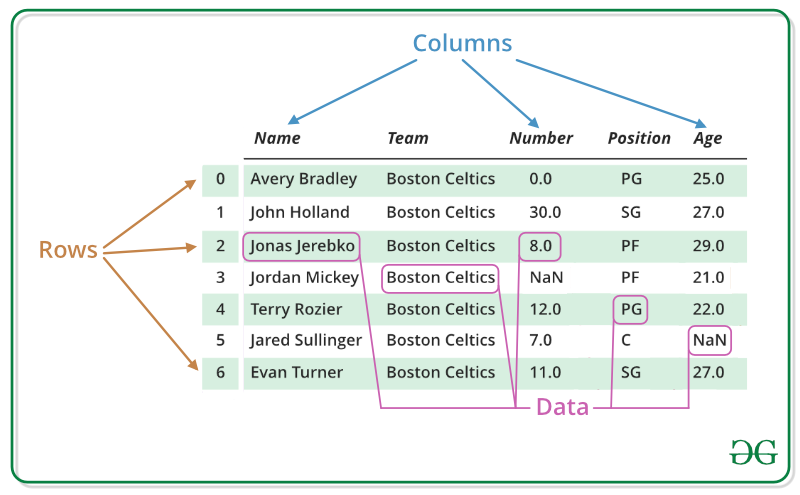


(source [geeksforgeeks](https://www.geeksforgeeks.org/python-pandas-dataframe/), nice introduction to DataFrames)

<a id='2.1'></a>

## 2.1 Lectura/Escritura de datos

### 2.1.1 Nuestros datos generados en Python

Manuel y su abuela han estado monitoreando sus horas de sueño. Veamos que pinta tienen los datos en un DataFrame

In [27]:
horas_cama_abuela = [
    7, 7, 7, 7, 7, 7, 7, 
    6, 6, 7, 7, 7, 7, 7,
    7, 7, 7, 7, 7, 7, 7, 
    7, 7, 7, 7, 7, 7, 7,
    8, 8
]
horas_cama_manuel = [
    7, 6, 6, 8, 5, 7, 8, 
    9, 6, 9, 5, 8, 7, 7, 
    8, 7, 7, 6, 6, 7, 8, 
    7, 6, 6, 6, 9, 9, 8,
    7, 5
]

data = {'abuela': horas_cama_abuela,
       'manuel': horas_cama_manuel}
print(data)

{'abuela': [7, 7, 7, 7, 7, 7, 7, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8], 'manuel': [7, 6, 6, 8, 5, 7, 8, 9, 6, 9, 5, 8, 7, 7, 8, 7, 7, 6, 6, 7, 8, 7, 6, 6, 6, 9, 9, 8, 7, 5]}


In [28]:
df_horas_dormir = pd.DataFrame(data)
df_horas_dormir

,abuela,manuel
0,7,7
1,7,6
2,7,6
3,7,8
4,7,5
5,7,7
6,7,8
7,6,9
8,6,6
9,7,9


Ahora, si queremos guardar el archivo:

In [29]:
df_horas_dormir.to_csv('data/datos_dormir.csv', index=0)

### 2.1.1 Datos en CSV o Microsoft Excel 

Microsoft Excel o CSV son tan solo dos ejemplos de la multitud de formatos que puedes cargar en un DataFrame. ¡Échale un vistazo a la [documentación](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) para saber más!

In [30]:
df_desde_Excel = pd.read_excel('data/ocupaciones_excel.xlsx', index_col='user_id')
df_desde_Excel

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
...,...,...,...,...
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229


In [32]:
# Mismos datos leídos desde url en formato tsv.
# En este caso explicitamos que queremos usar la columna user_id como índice

pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', 
                      sep='|', index_col='user_id')

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
...,...,...,...,...
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229


<a id='2.2'></a>

## 2.2 Análisis exploratorio de datos (EDA)

Una de las múltiples ventajas de utilizar DataFrames es que viene con multitud de métodos integrados para la exploración de datos.

**(Lo primero de todo...)**

In [41]:
# df_desde_Excel
# df_horas_dormir

# .head(), .tail(), .sample()
df_horas_dormir.head(7)

,abuela,manuel
0,7,7
1,7,6
2,7,6
3,7,8
4,7,5
5,7,7
6,7,8


**¿Qué forma tienen mis datos?**

In [39]:
# # (filas, columnas)
df_desde_Excel.shape

(943, 4)

**¿Cómo se llaman las columnas?**

In [46]:
df_desde_Excel.columns

Index(['age', 'gender', 'occupation', 'zip_code'], dtype='object')

**¿Qué tipos de datos tengo?**

In [44]:
df_desde_Excel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 1 to 943
Data columns (total 4 columns):
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(1), object(3)
memory usage: 36.8+ KB


<center><span style="color:blue">QUIZ!</span>: ¿Por qué unas veces hay paréntesis y otras no?</center>

**¿Cuáles son sus estadísticas básicas?**

In [47]:
df_horas_dormir.describe()

,abuela,manuel
count,30.000000,30.000000
mean,7.000000,7.000000
std,0.371391,1.203443
min,6.000000,5.000000
25%,7.000000,6.000000
50%,7.000000,7.000000
75%,7.000000,8.000000
max,8.000000,9.000000


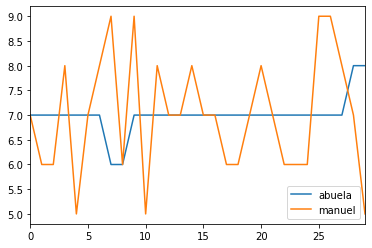

In [49]:
df_horas_dormir.plot();

In [51]:
df_desde_Excel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 1 to 943
Data columns (total 4 columns):
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(1), object(3)
memory usage: 36.8+ KB


In [53]:
df_desde_Excel.describe(include=[object])

,gender,occupation,zip_code
count,943,943,943
unique,2,21,795
top,M,student,55414
freq,670,196,9


<center><span style="color:blue">QUIZ!</span>: ¿Qué ha pasado con `gender`, `ocupation`, y `zip_code``?
</center>

In [14]:
# df_desde_Excel.info()

**¿Y si quiero saber las estadísticas de diferentes grupos?**

In [54]:
# df_desde_Excel.groupby('occupation').mean() 
df_desde_Excel.groupby('occupation').agg(['mean', 'std'])

age           
                    mean        std
occupation                         
administrator  38.746835  11.123397
artist         31.392857   8.668116
doctor         43.571429  12.501428
educator       42.010526  10.413264
engineer       36.388060  11.199236
entertainment  29.222222  10.056052
executive      38.718750  10.608075
healthcare     41.562500  11.313524
homemaker      32.571429  10.737119
lawyer         36.750000  10.830303
librarian      40.000000  11.023611
marketing      37.615385   9.474500
none           26.555556  13.757826
other          34.523810  10.738227
programmer     33.121212   9.624512
retired        63.071429   5.757461
salesman       35.666667  14.079859
scientist      35.548387   7.392964
student        22.081633   5.284081
technician     33.148148   9.867210
writer         36.311111  11.423306

<a id='2.3'></a>

## 2.3. Manipulación de datos:

Esto es solo una muestra del verdadero poder de pandas!
    

In [55]:
# # introducir nuevos valores
df_horas_dormir.at[31, 'manuel'] = 8

In [56]:
df_horas_dormir

,abuela,manuel
0,7.0,7.0
1,7.0,6.0
2,7.0,6.0
3,7.0,8.0
4,7.0,5.0
5,7.0,7.0
6,7.0,8.0
7,6.0,9.0
8,6.0,6.0
9,7.0,9.0


In [59]:
# # eliminar valores
df_horas_dormir.drop(31, inplace=True)

In [60]:
# # Quiz: ¿Por qué no se ha borrado?
df_horas_dormir

,abuela,manuel
0,7.0,7.0
1,7.0,6.0
2,7.0,6.0
3,7.0,8.0
4,7.0,5.0
5,7.0,7.0
6,7.0,8.0
7,6.0,9.0
8,6.0,6.0
9,7.0,9.0


In [61]:
# # filtrar observaciones
df_desde_Excel[df_desde_Excel.occupation == 'writer']

,age,gender,occupation,zip_code
user_id,,,,
3,23,M,writer,32067
21,26,M,writer,30068
22,25,M,writer,40206
28,32,M,writer,55369
50,21,M,writer,52245
122,32,F,writer,22206
196,49,M,writer,55105
199,30,M,writer,17604
201,27,M,writer,E2A4H


In [63]:
# # slicing
df_desde_Excel.iloc[3:10,:] # Quiz: ¿de que otra forma podemos obtener este mismo resultado?

,age,gender,occupation,zip_code
user_id,,,,
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002
10,53,M,lawyer,90703


In [64]:
# # reformatear (wide --> long)
df_horas_dormir.melt(var_name='persona', value_name='horas')

,persona,horas
0,abuela,7.0
1,abuela,7.0
2,abuela,7.0
3,abuela,7.0
4,abuela,7.0
5,abuela,7.0
6,abuela,7.0
7,abuela,6.0
8,abuela,6.0
9,abuela,7.0


In [22]:
# # reformatear (long --> wide)
# df_desde_Excel.pivot(columns='occupation', values='age')

<a id='3'></a>

# 3. Pandas in action: the real life...

Los datos que hemos analizado en este ejercicio estaban bien formateados desde el principio... pero la realidad es muy diferente. 

Durante el proyecto [Conectaula](https://www.conectaula.com/) (UC3M, Oxford, BraveUp) realizamos miles de encuestas a estudiantes de distintos centros y edades. El software que empleábamos nos permitía exportar los resultados en formato Excel, pero: ¿¡Os imagináis tener que limpiar, agrupar, y formatear todos esos archivos de forma manual!? Por suerte, el uso de pandas/python permite **automatizar procesos**.

In [65]:
# # Haciendo esto conseguimos que se vean hasta 120 columnas
pd.set_option("display.max_columns", 120)

# Echemos un vistazo a datos un poco más realistas...
pd.read_excel('data/survey_data.xlsx').head(3)

,Usuario Id,Alumno Id,Estudio,Curso,Grupo,Sexo,Año,Activo,Registro,Muchas gracias por participar en esta encuesta. Esto es una encuesta que realiza tu centro educativo para conocer el clima social y emocional de sus estudiantes. Los resultados de la encuesta serán usados para mejorar la convivencia y el ambiente educativo,,INSTRUCCIONES:,.1,LEE BIEN TODAS LAS PREGUNTAS,.2,REALIZA LA ACTIVIDAD DE FORMA INDIVIDUAL Y EN SILENCIO,.3,RESPETA LA PRIVACIDAD DE TUS COMPAÑEROS/AS,.4,"Empezaremos por preguntas sobre tus amistades dentro del centro. En cualquiera de las preguntas, si no deseas marcar a ningún compañero/a marca «Ninguno».",.5,¿Quiénes son tus amigos/as dentro del centro?,"Selecciona a tus amigos\t--ASOCIADA--De entre las personas que has seleccionado: ¿quiénes dirías que son tus mejores amigos/as? (Nos referimos a aquellas personas con las que eres ""uña y carne"") [NOTA: Ignora esta pregunta si has seleccionado ""Ninguno"" en la anterior.]",.6,"A continuación te planteamos preguntas sobre las personas que no te caen bien o con las que te llevas mal. En cualquiera de las preguntas, si no deseas marcar a ningún compañero/a marca «Ninguno».",.7,¿Qué compañeros/as no te caen del todo bien o no tienes buena relación con ellos?,"Selecciona a los compañeros con los que no tienes una buena relación--ASOCIADA--De entre las personas que has seleccionado: ¿hay alguna con la que tengas una relación especialmente mala o problemática? [NOTA: Ignora esta pregunta si has seleccionado ""Ninguno"" en la anterior.]",.8,"A continuación, queremos conocer mejor con quien te gusta (o gustaría) trabajar en tu clase y con quien no.",.9,Si tuvieras que hacer un trabajo en clase: ¿a quién o quiénes elegirías de compañeros/as? Marca «Ninguno» si prefieres trabajar solo/a.,.10,.11,Marca los compañeros/as con los que preferirías no tener que hacer un trabajo de clase. Marca «Ninguno» si no tienes inconveniente en trabajar con nadie en particular.,.12,.13,¿Qué compañero/a de la clase crees que tiene las habilidades necesarias para ayudar en caso de que alguien lo necesite?\t,.14,.15,"Saber escuchar, no contar los secretos, ponerse en el lugar de otro y no juzgar, son algunas de las habilidades necesarias para ser un buen mediador/a. ¿Quién crees que tiene estas habilidades dentro de tu clase?\t",.16,.17,"Si tuvieras un problema, ¿a qué compañero/a de la clase se lo contarías? \t",.18,.19,"Por favor, indícanos con qué frecuencia te ocurren las siguientes cosas:",Entiendo porqué hago las cosas que hago,Tengo en cuenta los criterios elegidos antes de hacer una recomendación,"Si un amigo está disgustado, tengo una idea clara de por qué.",Considero los puntos fuertes y débiles de una estrategia antes de decidir utilizarla.,"Si alguien está triste, enfadado o feliz, yo creo que sé lo que está pensando",.20,Reconozco cómo se siente la gente con sólo observar sus expresiones faciales.,Mantengo la calma cuando las cosas salen mal,"A la hora de tomar decisiones, tengo en cuenta las consecuencias de mis acciones",Soy consciente de la cosas que hago y de las que pienso,Me puedo mantener tranquilo en situaciones estresantes,.21,Defiendo mis posturas sin menospreciar a los demás,Pido perdón cuando le hago daño a un amigo sin querer,Sé por las caras de las personas cuando están enfadadas,Sé cuando estoy de mal humor,Soy tolerante con los errores de mis amigos,.22,Evalúo las ventajas de la situación antes de decidir sobre mi forma de actuar,Puedo controlar la forma en la que me siento cuando pasa algo malo,Entiendo por qué la gente reacciona como reacciona,"Cuando estoy disgustado con alguien, espero hasta que me haya calmado antes de discutir el asunto.",Mantengo la calma y controlo la ansiedad en situaciones nuevas o cambiantes,.23,Trato de consolar a mis amigos cuando se sienten tristes,Me aseguro de que haya más resultados positivos que negativos a la hora de tomar una decisión,Trato de no criticar a mis amigos cuando nos peleamos,Me resulta fácil entender por qu

<a id='4'></a>

# 4. Conclusiones


* Pandas es la **libreria por excelencia** para la manipulación de datos en Python tanto en el sector privado como en el académico.
* **DataFrame** es probablemente el objeto de pandas más utilizado. Nos permite limpiar, analizar, leer, salvar, agrupar... prácticamente todo lo que se te ocurra!
* DataFrame (pandas en general) es una herramientas ampliamente utilizada tanto en el **sector privado como en el académico**
* El uso de tecnologías como pandas/python (vs i.e. Microsoft Excel) permite **escalar y automatizar procesos**.


<center><span style="color:blue">QUIZ!</span>: ¿Cuántas librerias hemos tenido que importar para realizar este ejercicio?</center>

<a id='5'></a>

# 5. Material adicional


Practise makes perfect!

* ["10 minutes to pandas"](https://pandas.pydata.org/docs/user_guide/10min.html): Guía rápida para comenzar a usar pandas
* [Geeks for geeks](https://www.geeksforgeeks.org/python-pandas-dataframe/): Introducción a DataFrame
* [Documentación oficial de pandas](https://pandas.pydata.org/pandas-docs/stable/index.html)
* [Repositorio con ejercicios para practicar](https://github.com/guipsamora/pandas_exercises)
* [Python Data Science Handbook](https://github.com/guipsamora/pandas_exercises): Libro gratuito online con multitud de ejemplos y recursos

Volver al [índice](#intro)